In [19]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [20]:
from IPython.display import Audio
import noisereduce as nr
from pydub import AudioSegment 
from tempfile import mktemp
import wave
from scipy.io.wavfile import read, write

In [21]:
# Converting mp3 to wav
mp3File = AudioSegment.from_mp3(r'orcacall.mp3')
wname = mktemp('.wav')
mp3File.export(wname, format="wav")
wavFile = wave.open(wname, "r")

In [22]:
(Frequency, array) = read(wname) # Reading the sound file.

In [23]:
#Audio before noise reduction
Audio(array[:,1],rate=Frequency)

GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


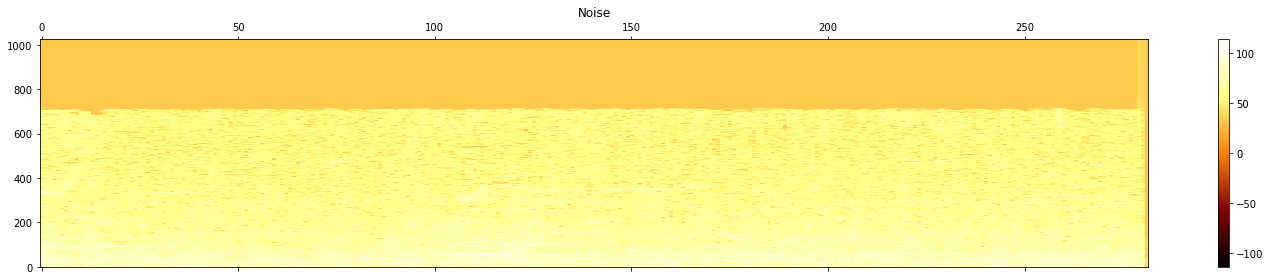

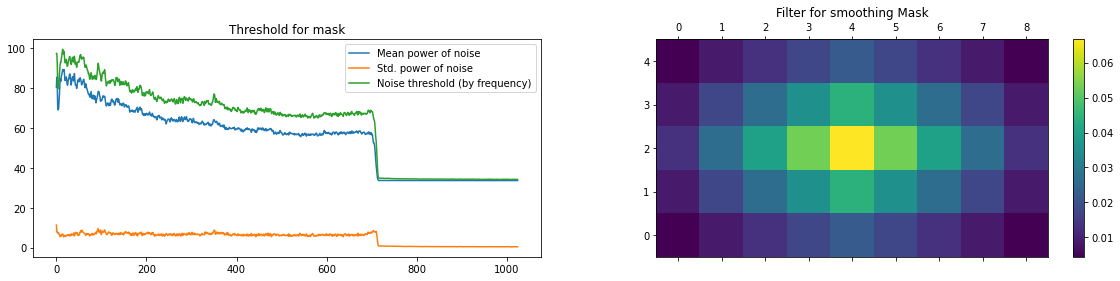

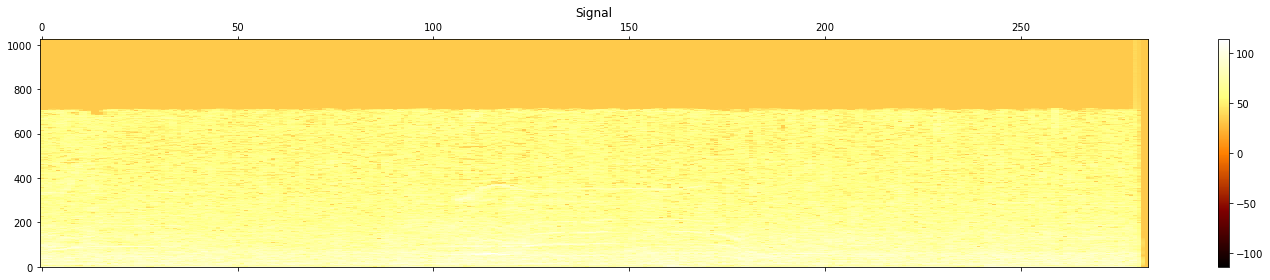

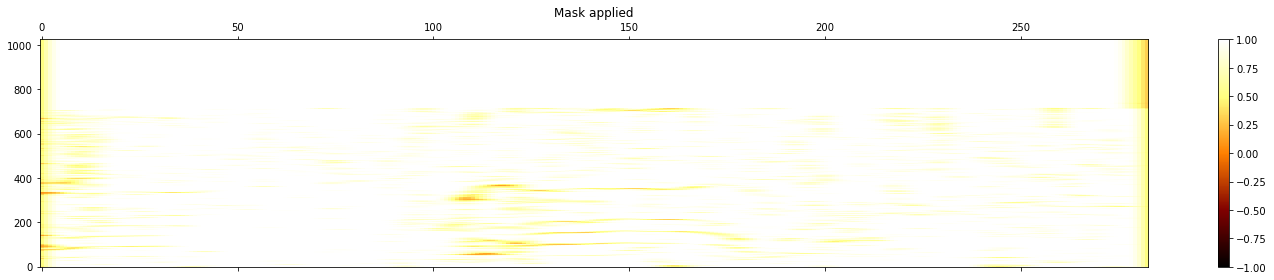

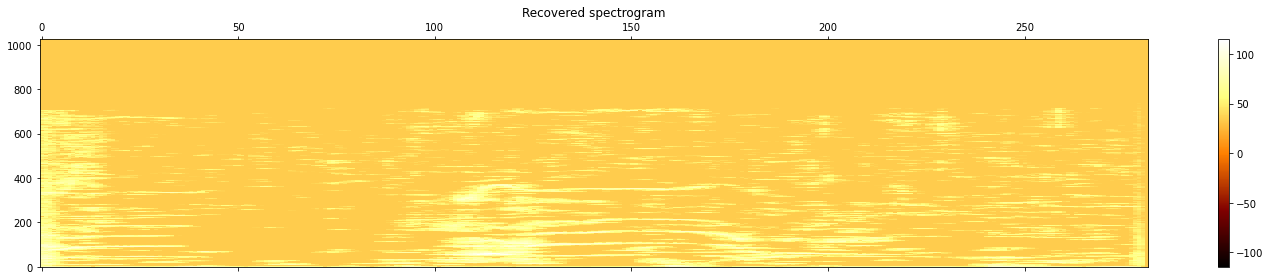

In [24]:
# select section of data that is noise
noisy_part = array[:,1]
# perform noise reduction
reduced_noise = nr.reduce_noise(audio_clip=array[:,1].astype('float32'), noise_clip=noisy_part.astype('float32'), use_tensorflow=True, verbose=True)

In [25]:
#Audio after noise reduction
Audio(data=reduced_noise, rate=Frequency)